# Czym jest konwolucja
### Konwolucja polega na przesuwaniu tzw. filtru (lub jądra konwolucji) po danych wejściowych i obliczaniu iloczynu skalarnych wartości filtru z odpowiadającymi im wartościami danych wejściowych. Wyniki tych obliczeń są sumowane, aby stworzyć pojedynczą wartość w wyjściowej mapie cech.

![picture](https://drive.google.com/uc?id=1fm_TWQu-vESP0XLFdPNK2pVVGaUKoQaT)


### W kontekście obrazów polega to na przesuwaniu **Kernel** - filtra, mnożąc obraz wejściowy przez filter a nazstępnie sumując wszystkie elementy otrzymujemy obraz wyjściowy. W zależności przez jaki filtr będziemy mnożyli możemy odzyskać różne wyniki.

![picture](https://drive.google.com/uc?id=1meCDtDeEFU8tJ6XdG9sCiyAZU4FEwmip)

## 1) Mnożenie przez filtr - macierz która ma wartości dodatnie, przykładowo:

           [[1/9, 1/9, 1/9],                 [[1/18, 1/18, 1/18],
           [1/9, 1/9, 1/9],        lub       [1/18, 10/18, 1/18],     
           [1/9, 1/9, 1/9]]                  [1/18, 1/18, 1/18]]

![picture](https://drive.google.com/uc?id=1lMsLw31QW5e340GHAgklgM6i7Drr1XdA)


## 2) Mnożenie przez filtr - macierz która ma wartości mieszane, przykładowo:


           [[-1, 0, 1],                     [[1, 2, 1],
           [-2, 0, 2],           i          [0, 0, 0],     
           [-1, 0, 1]]                      [-1, -2, -1]]

![picture](https://drive.google.com/uc?id=1fAGj-Kx4Ef95q_WdmFKDgWtkXLGEV5Pr)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


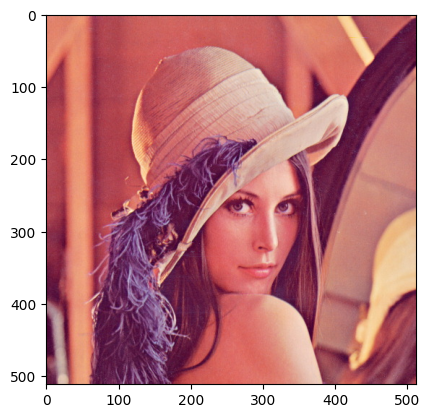

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img_path="/content/drive/MyDrive/Tensorflow 2.0: Deep Learning and Artificial Intelligence/images/lHV8B.jpg"
img=plt.imread(img_path)
plt.imshow(img)
plt.show()

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img=rgb2gray(img)

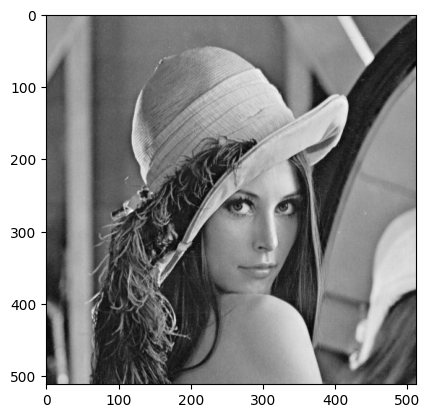

In [ ]:
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
# convolucia - blur
kernal = np.array([[1/18, 1/18, 1/18,1/18, 1/18, 1/18], #Filrt
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18]])

temporary_list=[]
matrix=[] #final image
for x in range(img.shape[0]-13):
  temporary_list=[]
  for y in range(img.shape[1]-13):
    temporary_list.append(sum(sum(img[x:x+6, y:y+6]*kernal)))
  matrix.append(temporary_list)

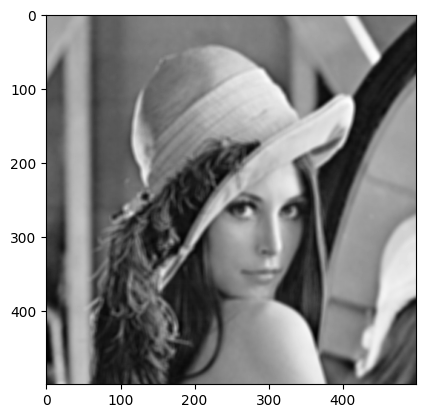

In [ ]:
image_conv=np.array(matrix)
plt.imshow(image_conv, cmap="gray")
plt.show()

In [ ]:
kernal = np.array([[0, 1/18, 1/18,1/18, 1/18, 0], #Filrt
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [1/18, 1/18, 2/18, 2/18, 1/18, 1/18],
                  [1/18, 1/18, 2/18, 2/18, 1/18, 1/18],
                  [1/18, 1/18, 1/18, 1/18, 1/18, 1/18],
                  [0, 1/18, 1/18, 1/18, 1/18, 0]])

temporary_list=[]
matrix=[] #final image
for x in range(img.shape[0]-6):
  temporary_list=[]
  for y in range(img.shape[1]-6):
    temporary_list.append(sum(sum(img[x:x+6, y:y+6]*kernal)))
  matrix.append(temporary_list)

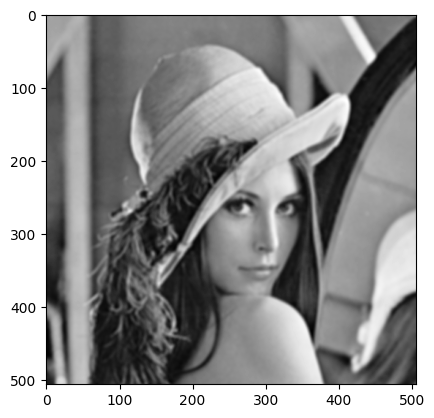

In [ ]:
image_conv=np.array(matrix)
plt.imshow(image_conv, cmap="gray")
plt.show()

In [ ]:
# convolucja - edge detection, tylko jedną macierzę
kernal = np.array([[-1, 0, 1], #Filrt
                  [-2, 0, 2],
                  [-1, 0, 1]])


temporary_list=[]
matrix=[] #final image
for x in range(img.shape[0]-3):
  temporary_list=[]
  for y in range(img.shape[1]-3):
    temporary_list.append(sum(sum(img[x:x+3, y:y+3]*kernal)))
  matrix.append(temporary_list)

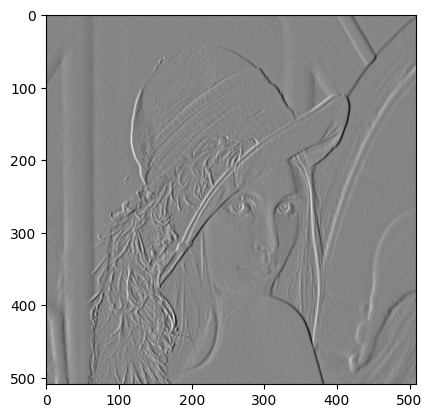

In [ ]:
image_conv=np.array(matrix)
plt.imshow(image_conv, cmap="gray")
plt.show()

In [ ]:
# convolucja - edge detection, dwie macierze
kernal_1 = np.array([[-1, 0, 1], #Filrt
                  [-2, 0, 2],
                  [-1, 0, 1]])

kernal_2 = np.array([[1, 2, 1], #Filrt
                  [0, 0, 0],
                  [-1, -2, -1]])

temporary_list=[]
matrix=[] #final image
for x in range(img.shape[0]-3):
  temporary_list=[]
  for y in range(img.shape[1]-3):
    temporary_list.append(sum(sum(img[x:x+3, y:y+3]*kernal_1*kernal_2)))
  matrix.append(temporary_list)

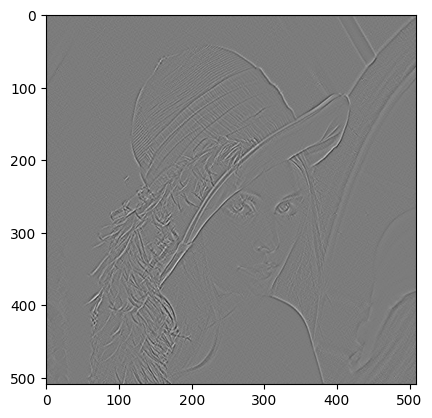

In [ ]:
image_conv=np.array(matrix)
plt.imshow(image_conv, cmap="gray")
plt.show()

# W wyniku konwolucji możemy lokalizować cechy charakterystyczne dla danego obrazu

### W dużym skrócie wynika z tego że konwolucja jest po prostu wyszukiwarką paternów, dobrze dobrany filtr będzie mógł zlokalizować cechy charatkerystyczne np. oko, rysy twarzy itp.
![picture](https://drive.google.com/uc?id=1JBYHHrA8Ah1tWDZ_1sYTCUmM6LC8liRd)



# Kolorowe obrazy
### Jeśli chodzi o kolorowe obrazy, wystarczy zastosować trójwymiarowy filtr h * w * 3.  Wynikiem takiej operacji jest obraz wynikowy o rozmiarze h * w * 1 ponieważ tutaj sumujemy też wszystkie piksele do jednego więc w tym przypadku będzie ich 3 razy więcej. Jeśli zastosujemy 10 filtrów na obraz wejściowy to wynikiem takiej operacji będzie obraz wyjściowy o rozmiarach w * h * 10. Będzie to obraz wynikowy zawierający cechy charakterystyczne dla każdego filtra w odpowiadającym im warstwach.


![picture](https://drive.google.com/uc?id=1HL878XW73r1GqWS2XKw7okxGth5TRGzv)




# Dlaczego stosujemy konwolucyjną sieci neuronową a nie normalną sieć neuronową?

### Konwolucyjna sieć neuronowa oszczędza nam bardzo dużo operacji, o wiele szybciej wyszukujemy cechy charakkterystyczne dla obrazów dzięki konwolucji, otrzymując podobne wyniki.


### W tym przypadku jest to 32 tysiące mniej operacji
![picture](https://drive.google.com/uc?id=1-tRcYhD16iltXKTn8zFoD7qzJrcG0iS6)
![picture](https://drive.google.com/uc?id=1C64u10Ls30kfd19W2EnKfbfaVif3RyDf)

